In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Loading and viewing Data**

In [2]:
header = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
auto = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", 
                   names=header)

auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Checking & Replacing Abnormalities**

In [6]:
cols = auto.select_dtypes('object').columns
for col in cols:
  auto[col] = auto[col].replace("?", np.nan)

**Check for Null Values**

In [7]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
auto.shape

(205, 26)

**Deleting 'price' rows with missing data**

In [9]:
auto = auto.dropna(subset=['price'])
auto.shape

(201, 26)

**Cleaning numerical columns**

In [10]:
num_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto[num_cols].dtypes

normalized-losses    object
bore                 object
stroke               object
horsepower           object
peak-rpm             object
dtype: object

In [11]:
auto[num_cols] = auto[num_cols].astype('float')
auto[num_cols].dtypes

normalized-losses    float64
bore                 float64
stroke               float64
horsepower           float64
peak-rpm             float64
dtype: object

In [12]:
auto[num_cols] = auto[num_cols].fillna(auto[num_cols].mean())
auto[num_cols].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

In [13]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Handling Categorical column**

In [14]:
auto['num-of-doors'].dtype
auto['num-of-doors'].fillna(auto['num-of-doors'].mode()[0], inplace = True)
auto['num-of-doors'].isnull().sum()

0

**Resetting the index**

In [15]:
auto.reset_index(drop=True)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [16]:
auto.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

**Converting numeric variables to float and numerical colums with categorical values into numeric values**

In [17]:
auto['price'] = auto['price'].astype('float64')

In [18]:
int_cols = auto.select_dtypes('int64')

for i in int_cols:
  auto[i] = auto[i].astype('float64')

In [19]:
auto.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [20]:
print(auto['num-of-doors'].unique())
print(auto['num-of-cylinders'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [21]:
convert = {'num-of-doors': {'two' : 2,
                            'four' : 4},
           'num-of-cylinders' : {'four' : 4,
                                 'six' : 6,
                                 'five' : 5,
                                 'three' : 3,
                                 'twelve' : 12,
                                 'two' : 2,
                                 'eight' : 8}}

In [22]:
auto.replace(convert, inplace=True)
auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,2.0,122.0,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,1.0,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,1.0,122.0,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,1.0,158.0,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,5,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
10,2.0,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0


In [23]:
auto['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

**Column Transformation**

In [24]:
auto['city-L/100km'] = 235 / auto['city-mpg']
auto['highway-L/100km'] = 235 / auto['highway-mpg']
auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,11.190476,8.703704
1,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,11.190476,8.703704
2,1.0,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,12.368421,9.038462
3,2.0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,9.791667,7.833333
4,2.0,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,13.055556,10.681818
5,2.0,122.0,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,12.368421,9.400000
6,1.0,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0,12.368421,9.400000
7,1.0,122.0,audi,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0,12.368421,9.400000
8,1.0,158.0,audi,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,ohc,5,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0,13.823529,11.750000
10,2.0,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0,10.217391,8.103448


**Column Normalization**

In [25]:
params = ['length', 'width', 'height']

for param in params:
  auto[param] = auto[param]/auto[param].max()

auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,11.190476,8.703704
1,3.0,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,11.190476,8.703704
2,1.0,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,12.368421,9.038462
3,2.0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,9.791667,7.833333
4,2.0,164.0,audi,gas,std,4,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,13.055556,10.681818
5,2.0,122.0,audi,gas,std,2,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,12.368421,9.400000
6,1.0,158.0,audi,gas,std,4,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0,12.368421,9.400000
7,1.0,122.0,audi,gas,std,4,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0,12.368421,9.400000
8,1.0,158.0,audi,gas,turbo,4,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086.0,ohc,5,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0,13.823529,11.750000
10,2.0,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0,10.217391,8.103448


**Plotting Histogram**

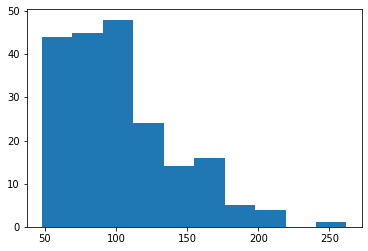

In [26]:
plt.hist(auto['horsepower'])
plt.show()

In [27]:
bins = ['low', 'medium', 'high']

auto['horsepower_binned'] = pd.qcut(auto['horsepower'], q = 3, labels=bins)
auto['horsepower_binned'].value_counts()

low       68
medium    67
high      66
Name: horsepower_binned, dtype: int64

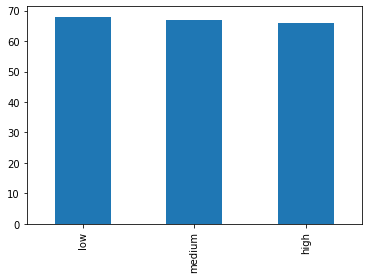

In [28]:
auto['horsepower_binned'].value_counts().plot(kind='bar')

**One Hot Encoding**

In [29]:
print(auto['fuel-type'].unique())
print(auto['aspiration'].unique())

['gas' 'diesel']
['std' 'turbo']


In [30]:
ohe_cols =  ['fuel-type', 'aspiration']

auto = pd.concat([auto.drop(ohe_cols, axis = 1), pd.get_dummies(auto[ohe_cols])], axis = 1)
auto.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower_binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3.0,122.0,alfa-romero,2,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,11.190476,8.703704,medium,0,1,1,0
1,3.0,122.0,alfa-romero,2,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548.0,dohc,4,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,11.190476,8.703704,medium,0,1,1,0
2,1.0,122.0,alfa-romero,2,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823.0,ohcv,6,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,12.368421,9.038462,high,0,1,1,0
3,2.0,164.0,audi,4,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337.0,ohc,4,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,9.791667,7.833333,medium,0,1,1,0
4,2.0,164.0,audi,4,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824.0,ohc,5,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,13.055556,10.681818,high,0,1,1,0
5,2.0,122.0,audi,2,sedan,fwd,front,99.8,0.851994,0.920833,0.887960,2507.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0,12.368421,9.400000,medium,0,1,1,0
6,1.0,158.0,audi,4,sedan,fwd,front,105.8,0.925997,0.991667,0.931438,2844.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0,12.368421,9.400000,medium,0,1,1,0
7,1.0,122.0,audi,4,wagon,fwd,front,105.8,0.925997,0.991667,0.931438,2954.0,ohc,5,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0,12.368421,9.400000,medium,0,1,1,0
8,1.0,158.0,audi,4,sedan,fwd,front,105.8,0.925997,0.991667,0.934783,3086.0,ohc,5,131.0,mpfi,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0,13.823529,11.750000,high,0,1,0,1
10,2.0,192.0,bmw,2,sedan,rwd,front,101.2,0.849592,0.900000,0.908027,2395.0,ohc,4,108.0,mpfi,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0,10.217391,8.103448,medium,0,1,1,0
